In [1]:
%%shell

FOLDER=/content/BootstrapCCpy

if [ ! -d /"$FOLDER" ]; then 
  git clone https://github.com/NNelo/BootstrapCCpy.git
  cd /"$FOLDER"
  git checkout afc10987e1b96cfeefe025eac2a1bbe0032af5f0
  cd ..
else
  echo "Already cloned"
fi

pip install kneed

Cloning into 'BootstrapCCpy'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 68 (delta 27), reused 58 (delta 20), pack-reused 0
Unpacking objects: 100% (68/68), done.
Note: checking out 'afc10987e1b96cfeefe025eac2a1bbe0032af5f0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at afc1098 Enhancing the determination of k number


In [2]:
# Imports

from BootstrapCCpy import BootstrapCCpy as bcc
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
# Parameters

PERPLEXITY = [10, 30, 50, 70, 90, 110, 130, 150]
COMPONENTS = 2                                      
K_CLUSTERS = 6
B_SAMPLINGS = 150

In [4]:
# Selecting data set

from sklearn import datasets

iris = datasets.load_iris()

data = iris.data

In [5]:
# (Key, Value) = (perplexity, (best K found, areas))
best_K_results = dict()

for p in PERPLEXITY:
    CC = bcc.BootstrapCCpy(cluster=KMeans().__class__, K=K_CLUSTERS, B=B_SAMPLINGS)
    X_embedded = TSNE(n_components=COMPONENTS, perplexity=p).fit_transform(data)
    CC.fit(X_embedded)
    best_K_results[p] = { "k": CC.get_best_k(), "areas": CC.get_areas() }

In [6]:
# Reporting results

for p in best_K_results.keys():
    print("Perplexity: ", p, "; Best k found: ", best_K_results[p]["k"])

Perplexity:  10 ; k found:  3
Perplexity:  30 ; k found:  3
Perplexity:  50 ; k found:  3
Perplexity:  70 ; k found:  3
Perplexity:  90 ; k found:  3
Perplexity:  110 ; k found:  3
Perplexity:  130 ; k found:  3
Perplexity:  150 ; k found:  4


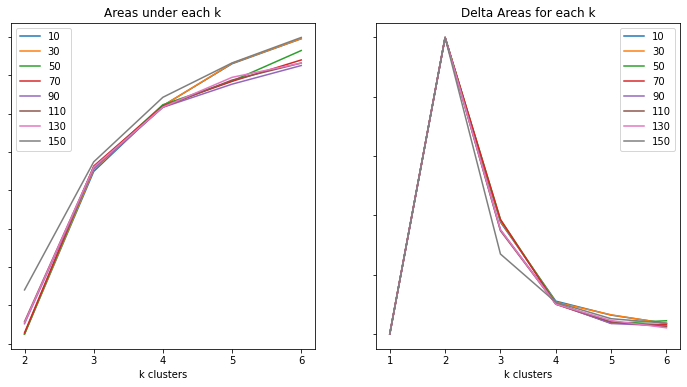

In [7]:
# Ploting compairson between areas and perplexities

matplotlib.rcParams['figure.figsize'] = 12, 6
f, (ax1, ax2) = plt.subplots(1, 2)

# Preparing left plot
xs = range(2, K_CLUSTERS + 1)
ax1.set_title("Areas under each k")
ax1.set_xlabel("k clusters")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_yticklabels([])

# Preparing right plot
ax2.set_title("Delta Areas for each k")
ax2.set_xlabel("k clusters")
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_yticklabels([])

for p in best_K_results:
    areas = best_K_results[p]["areas"]

    # Plotting areas curve
    ax1.plot(xs, areas, label=p)

    # Plotting delta areas curve
    dAreas = [None, 0, 1]
    for i in range(1, K_CLUSTERS-1):
        nDArea = (areas[i] - areas[i - 1]) / areas[i - 1]
        dAreas.append(nDArea)

    ax2.plot(dAreas, label=p)

ax1.legend()
ax2.legend()
plt.show()